In [2]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
from scipy.io import wavfile

fs, som = wavfile.read('elefante.wav')

ipd.Audio(som,rate=fs)

In [4]:
def plot_espectro_Omega(y):
    """ Rotina que exibe o espectro de magnitude (X(e^(jw))) de um sinal discreto em função de Omega"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (rad)
    w = np.linspace(-np.pi, np.pi, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # centrando fft(y) em 0
    fft_y_center = np.roll(fft_y_norm, fft_y.size//2)

    # exibe o grafico do espectro
    plt.figure() 
    plt.plot(w, fft_y_center)
    plt.xlabel('$\Omega$ [rad]', fontsize=10)
    plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
    plt.grid(True)
    plt.xticks(
        ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
        labels=[r'$-\pi$', r'$-\pi/2$', 0, r'$\pi/2$', r'$\pi$']
    )
    plt.show()


In [16]:
def plot_espectro_Hz(y, Fs, width=14, height=6, show=True, save=None):
    """ Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto em função de Hz"""

    # modulo da transf. de Fourier
    fft_y = np.abs(np.fft.fft(y))

    # frequencias avaliadas (Hz)
    f = np.linspace(0, Fs, fft_y.size)

    # normalizando fft(y)
    fft_y_norm = fft_y/np.max(fft_y)

    # exibe o grafico do espectro
    fig, ax = plt.subplots(figsize=(width, height))
    ax.plot(f, fft_y_norm)
    plt.xlabel('$f$ [kHz]', fontsize=18)
    plt.ylabel('|$Y(f)$|', fontsize=18)
    ax.grid(True)
    plt.yticks(fontsize=16)
    plt.xticks(
        ticks=[0, Fs//4, Fs//2, 3*Fs//4, Fs],
        labels=[0, Fs//4//1000, Fs//2//1000,3*Fs//4//1000, Fs//1000],
        fontsize=16
    )

    fig.tight_layout()

    if isinstance(save, str):
        fig.savefig(save)

    if show:
        fig.show()

    return fig, ax


<ipython-input-22-9fabfbd52c4b>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


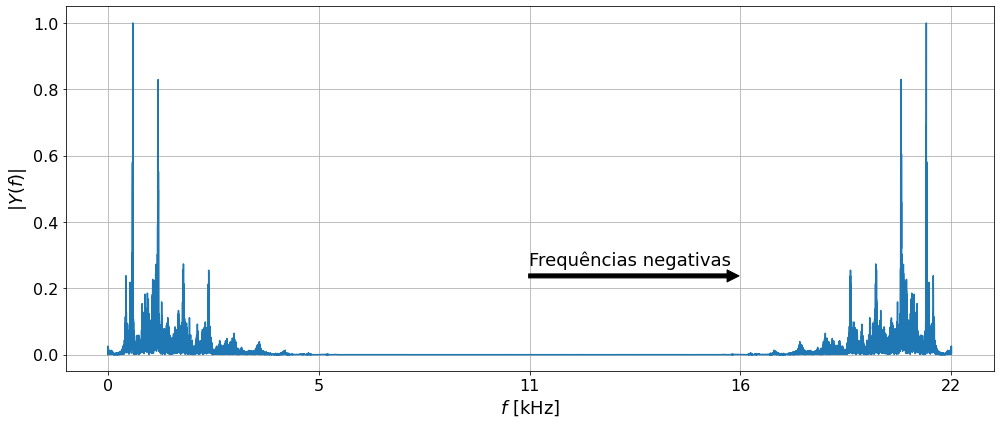

In [22]:
fig, ax = plot_espectro_Hz(
    som,
    fs,
    show=False,
)

ax.annotate('Frequências negativas', (11e3, .27), fontsize=18)
ax.annotate('', (16.5e3, .2375), (11e3, .2375), fontsize=18, arrowprops=dict(color='black'))

fig.savefig('espectro_Hz.png')

fig.show()


In [174]:
# Parte positiva

fft_y = np.abs(np.fft.fft(som))
fft_y /= np.max(fft_y)
f = np.linspace(0, fs, fft_y.size)


# plt.plot(f, fft_y)
index_max_p = np.where(fft_y == np.max(fft_y[:len(som)//2+1]))[0][0]
index_max_n = np.where(fft_y == (np.max(fft_y[len(som)//2:]))[0][0]

print(f[index_max_p], fft_y[index_max_p])
print(f[index_max_n], fft_y[index_max_n])

656.0664145469616 1.0
21394.31435528156 0.9999999999999998


<ipython-input-175-5796d86e6081>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


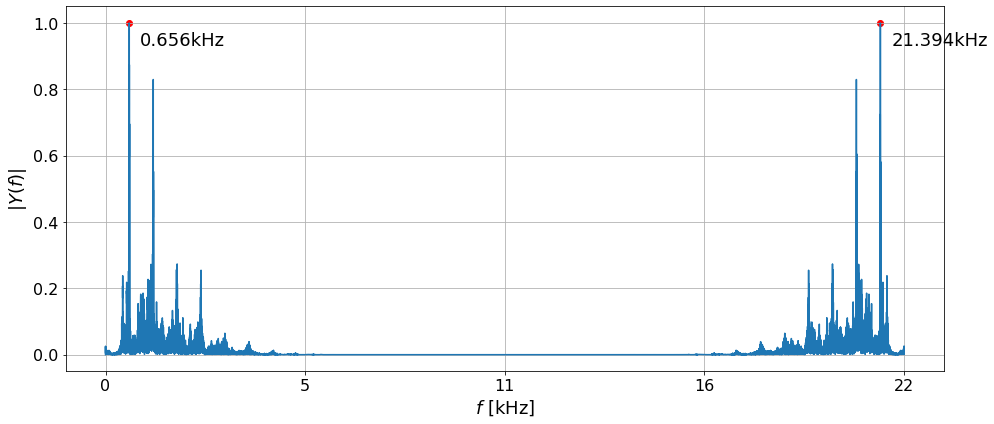

In [175]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f, fft_y)
ax.scatter([f[index_max_p], f[index_max_n]], [fft_y[index_max_p], fft_y[index_max_n]], c='r')
ax.annotate(f'{f[index_max_p]/1000:.3f}kHz', (f[index_max_p] + 300, fft_y[index_max_p] - 2/3/10), fontsize=18)
ax.annotate(f'{f[index_max_n]/1000:.3f}kHz', (f[index_max_n] + 300, fft_y[index_max_n] - 2/3/10), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs//4, fs//2, 3*fs//4, fs],
    labels=[0, fs//4//1000, fs//2//1000, 3*fs//4//1000, fs//1000],
    fontsize=16
)
fig.tight_layout()
fig.savefig('max_hz.png')
fig.show()

In [188]:
np.max(fft_y_sub[len(fft_y_sub)//2:])
print(index_max_sub_n)

2414


In [195]:
fft_y_sub = np.abs(np.fft.fft(som[::7]))
fft_y_sub /= np.max(fft_y_sub)
f_sub = np.linspace(0, fs/7, fft_y_sub.size)


# plt.plot(f_sub, fft_y_sub)
index_max_sub_p = np.where(fft_y_sub == np.max(fft_y_sub[:len(fft_y_sub)//2+1]))[0][0]
index_max_sub_n = np.where(fft_y_sub[len(fft_y_sub)//2:] == np.max(fft_y_sub[len(fft_y_sub)//2:]))[0][0]
index_max_sub_n +=len(fft_y_sub)//2

print(f_sub[index_max_sub_p], fft_y_sub[index_max_sub_p])
print(f_sub[index_max_sub_n], fft_y_sub[index_max_sub_n])

656.1230657640233 1.0
2494.2577369439073 1.0


<ipython-input-196-9eed528c5055>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


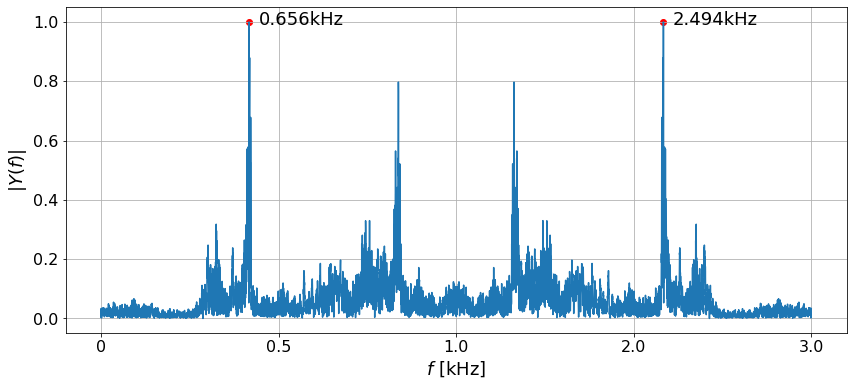

In [196]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f_sub, fft_y_sub)
ax.scatter([f_sub[index_max_sub_p], f_sub[index_max_sub_n]], [fft_y_sub[index_max_sub_p], fft_y_sub[index_max_sub_n]], c='r')
ax.annotate(f'{f_sub[index_max_sub_p]/1000:.3f}kHz', (f_sub[index_max_sub_p] + 300/7, fft_y_sub[index_max_sub_p] - 2/3/10/7), fontsize=18)
ax.annotate(f'{f_sub[index_max_sub_n]/1000:.3f}kHz', (f_sub[index_max_sub_n]+ 300/7, fft_y_sub[index_max_sub_n] - 2/3/10/7), fontsize=18)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs/7//4, fs/7//2, 3*fs/7//4, fs/7],
    labels=[0, (0.5 if (fs/7//4//1000 == 0) else fs//4//1000), fs/7//2//1000, 3*fs/7//4//1000, fs/7//1000],
    fontsize=16
)
fig.savefig('espectro_decimado_Hz.png')
fig.show()

In [219]:
def low_pass_filter(k_i,k_f, dft):
    for i in range(k_i,k_f+1):
        
    return dft

fft_filtered = low_pass_filter()

array([1.96196518e-10, 2.53544592e-02, 1.40399806e-02, ...,
       7.35733516e-03, 1.40399806e-02, 2.53544592e-02])

<ipython-input-214-b9e2e8b643f0>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


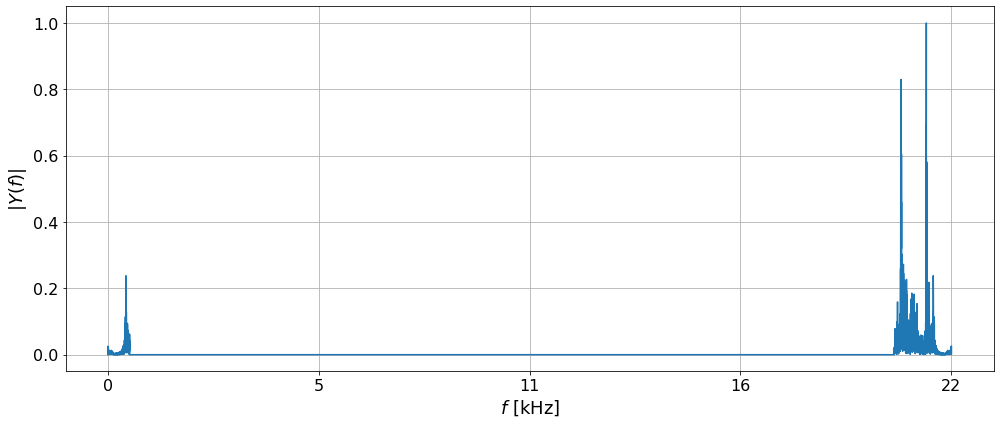

In [214]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(f, fft_ant_aliasing)
plt.xlabel('$f$ [kHz]', fontsize=18)
plt.ylabel('|$Y(f)$|', fontsize=18)
ax.grid(True)
plt.yticks(fontsize=16)
plt.xticks(
    ticks=[0, fs//4, fs//2, 3*fs//4, fs],
    labels=[0, fs//4//1000, fs//2//1000, 3*fs//4//1000, fs//1000],
    fontsize=16
)
fig.tight_layout()
fig.show()

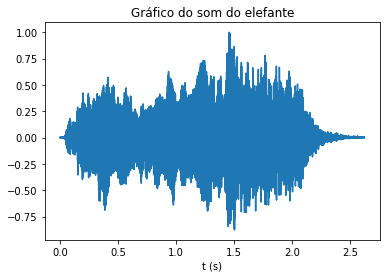

In [8]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');

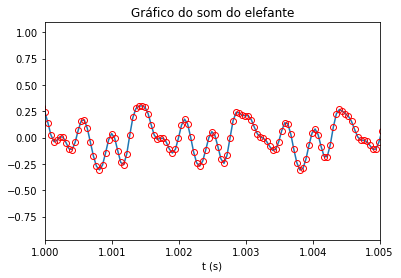

In [9]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do elefante')
plt.xlabel('t (s)');
plt.xlim((1,1.005));

In [10]:
subamostrado = som[::7]

fs_nova = 

ipd.Audio(subamostrado,rate=int(fs_nova))

SyntaxError: invalid syntax (<ipython-input-10-9ee2e7aa7776>, line 3)